In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [23]:
exam = pd.read_csv("exams.csv")
exam

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [24]:
exam.tail(10)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [25]:
exam.columns.to_list()

['gender',
 'race/ethnicity',
 'parent_education_level',
 'lunch',
 'test_prep_course',
 'math',
 'reading',
 'writing']

In [26]:
exam.isnull().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

In [27]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Questions

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.
6. Summarize your findings.

##### 1. What are the average reading scores for students with/without the test preparation course?

In [28]:
exam.groupby("test_prep_course")[["reading"]].mean()

,reading
test_prep_course,
completed,73.893855
none,66.534268


##### 3a. Visualization for question 1

Text(0.5, 1.0, 'Average reading scores with or without test preparation course')

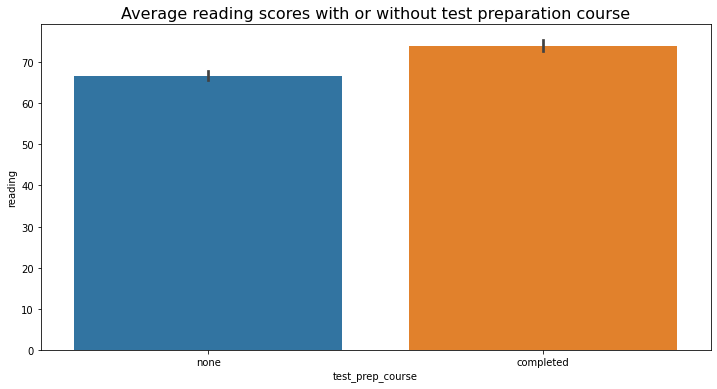

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x="test_prep_course", y="reading", data= exam)
plt.title('Average reading scores with or without test preparation course', fontsize = 16)

##### 2. What are the average scores for the different parental education levels?

In [30]:
pel = exam.groupby("parent_education_level").mean()
pel

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


##### 3b. Visualization for question 2

Text(0.5, 1.0, 'Average score based on parental education level')

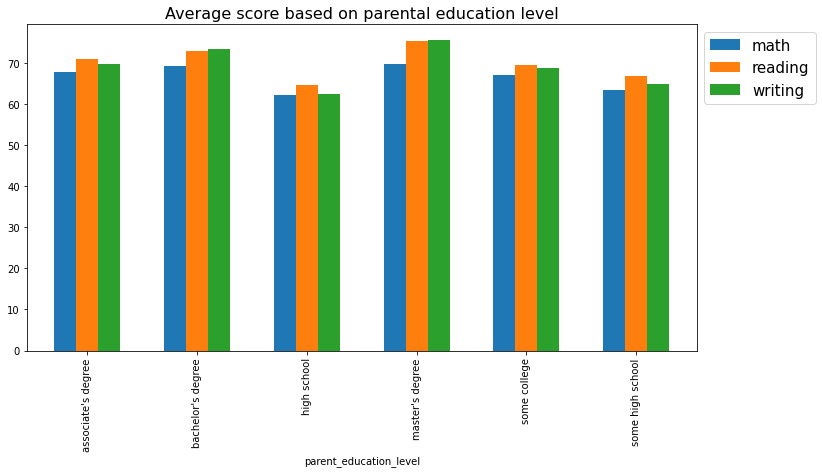

In [31]:
pel.plot(kind = 'bar', width = 0.6, figsize = (12,6))
plt.legend(bbox_to_anchor=(1,1), fontsize = 15)
plt.title("Average score based on parental education level", fontsize = 16)

##### 4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

In [32]:
#creating a copy of the original dataset
exam1 = exam.copy()

In [33]:
#creating an additional column
exam1['Average Score'] = round((exam1.math + exam1.reading + exam1.writing)/ 3,2)
exam1.sample(3)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,Average Score
332,male,group E,associate's degree,standard,completed,62,56,53,57.00
813,male,group E,some high school,standard,completed,87,84,76,82.33
233,male,group E,some high school,standard,none,92,87,78,85.67


In [34]:
exam1.columns.to_list()

['gender',
 'race/ethnicity',
 'parent_education_level',
 'lunch',
 'test_prep_course',
 'math',
 'reading',
 'writing',
 'Average Score']

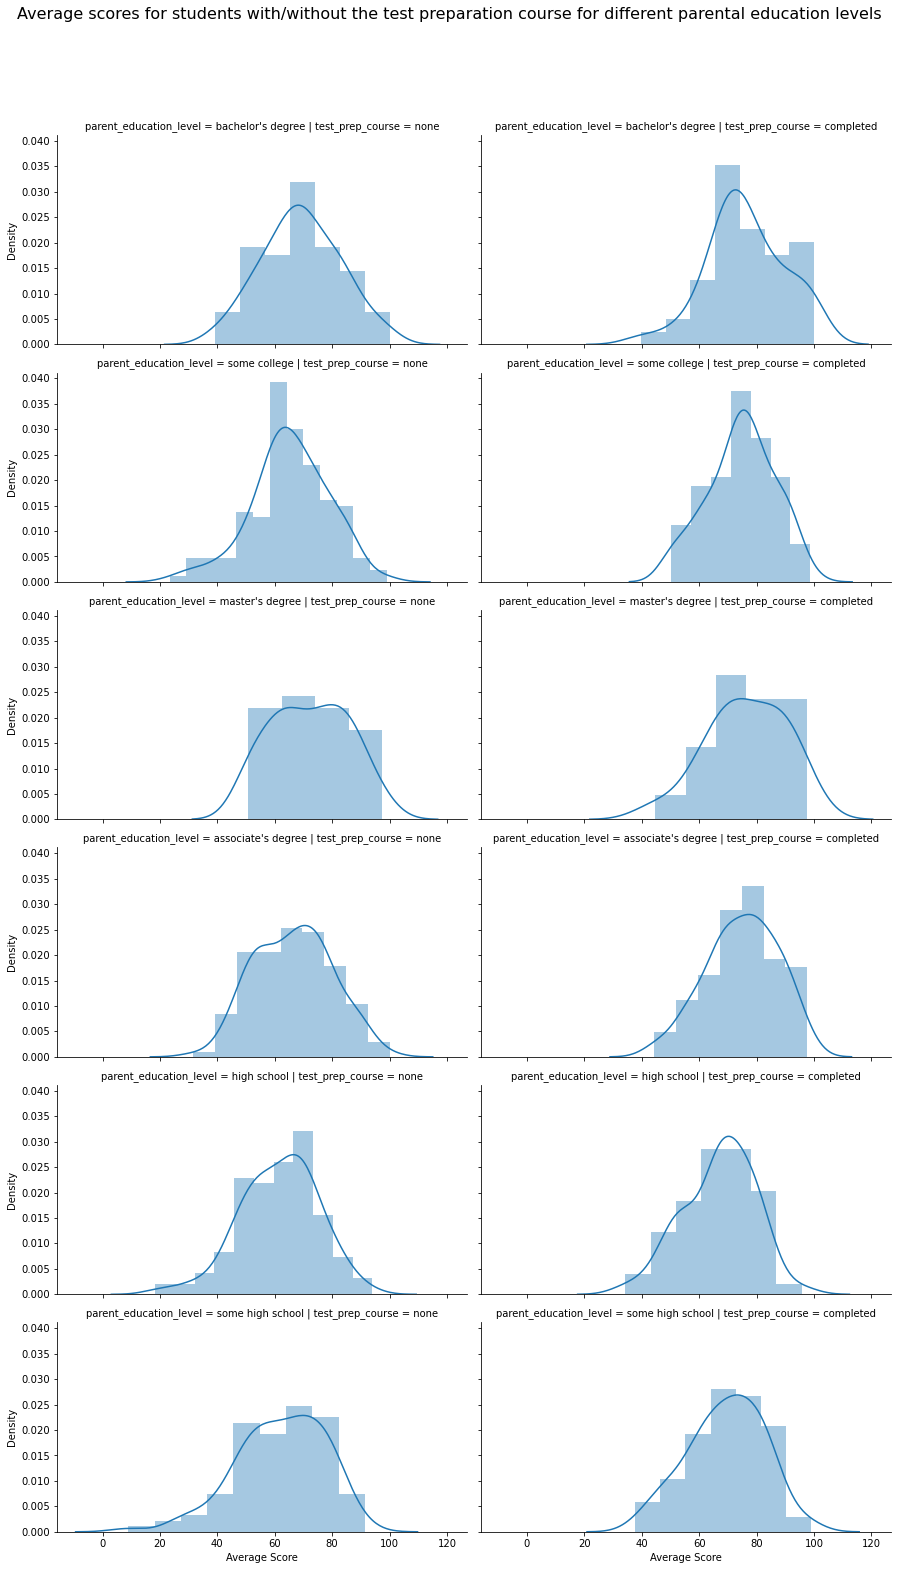

In [35]:
g = sns.FacetGrid(exam1, row = 'parent_education_level', col = 'test_prep_course', height = 3.7,aspect = 1.7)
g = g.map(sns.distplot,'Average Score')
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle("Average scores for students with/without the test preparation course for different parental education levels",
               fontsize = 16)
plt.show()


##### 5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

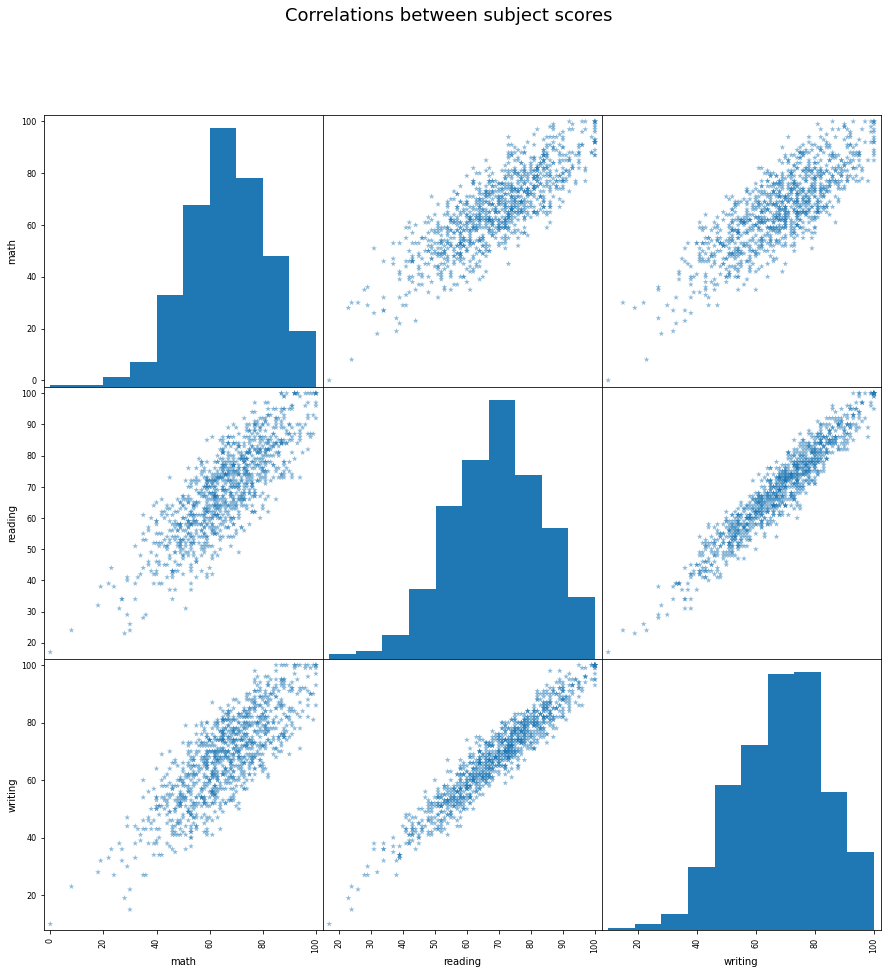

In [36]:
pd.plotting.scatter_matrix(exam,figsize = (15,15),marker= '*');
plt.suptitle("Correlations between subject scores", fontsize = 18)
plt.show()

##### 6. Summarize your findings.

- The students who completed the test preparation course had a higher reading average score compared to those who did not do the test preparation course.
- The exam scores for math, reading and writing are correlated with the parent education levels. Master's degree students acheive best average scores for the three exams while high school acheive the lowest average scores for the exams. The difference between the average scores for different parental education levels is not very wide. Average scores for different parent education levels increase with the educational level exposure; the more students advance in their education, the better their scores.
- Average scores for different parent education levels for those that completed the test preparation course and those that did not take the test preparation course show a symmetrical distribution. This shows that the test preparation course has no effect on the student's scores. After estimating the mean and the median, they all occured at the same point for the different levels, thus a symmmetrical distribution.
- The student's scores are highly positively correlated for the different subjects; a student who performs well on one subject also performs well on the others and likewise a student performing poorly in one subject performs poorly on the others.